<a href="https://colab.research.google.com/github/Ilyas-4212201020/Muhammad-Ilyas_4212201020_UTS-VISION/blob/main/Diwa_Canna_UTS_VISION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


LOOCV Result Data Training:
Confusion Matrix:
 [[57  0  0 ...  0  0  0]
 [ 0 81  0 ...  0  0  0]
 [ 1  0 99 ...  0  0  0]
 ...
 [ 1  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 22  1]
 [ 0  0  0 ...  0  1 33]]
Accuracy: 0.6957894736842105
Precision: 0.6950293001320158
Recall: 0.6957894736842105
F1 Score: 0.692429558482963

Test Result Data:
Confusion Matrix:
 [[54  0  0 ...  0  0  0]
 [ 0 98  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  1  0 ...  0  0 35]]
Accuracy: 0.6994736842105264
Precision: 0.6977920215991723
Recall: 0.6994736842105264
F1 Score: 0.6900146587398729


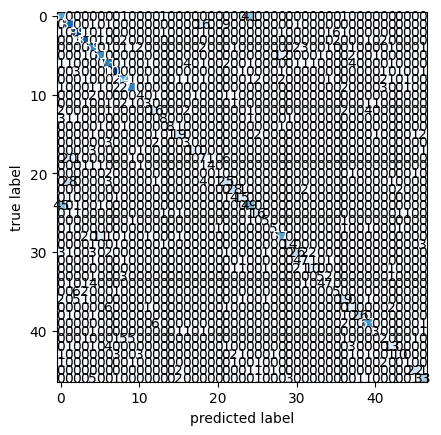

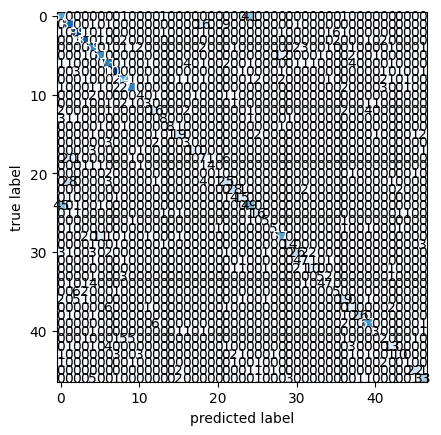

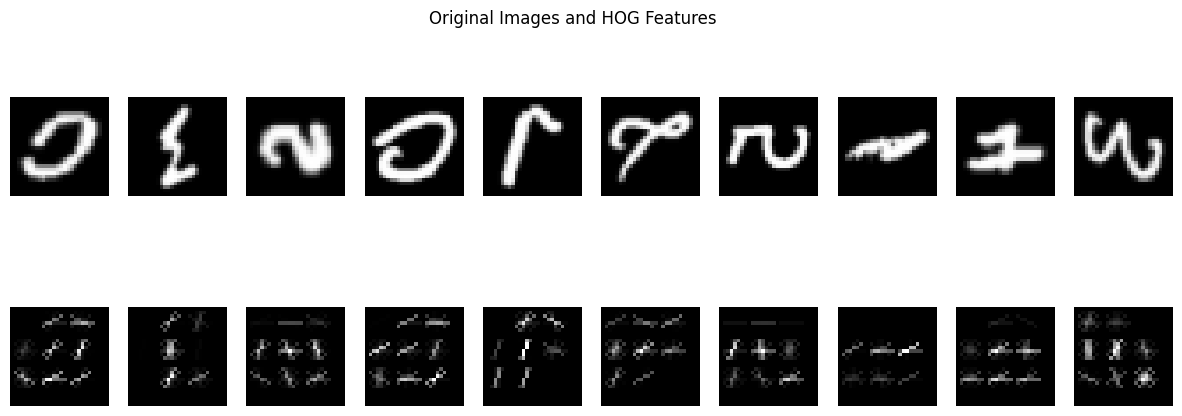

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from skimage.feature import hog
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset (replace with your actual file path)
train_data = pd.read_csv('../content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('../content/emnist-bymerge-test.csv', header=None)

# Limit the number of samples for training and testing
max_samples = 1900
x_train = train_data.iloc[:max_samples, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:max_samples, 0].values.astype('int')
x_test = test_data.iloc[:max_samples, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:max_samples, 0].values.astype('int')

# HOG Feature Extraction
def extract_hog_features(images):
    hog_features = []
    for image in images:
        feature, _ = hog(image.reshape((28, 28)), orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True, block_norm='L2')
        hog_features.append(feature)
    return np.array(hog_features)

hog_features_train = extract_hog_features(x_train)
hog_features_test = extract_hog_features(x_test)


# Normalize features
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train)
hog_features_test_scaled = scaler.transform(hog_features_test)


# SVM Classifier
clf = svm.SVC(kernel='linear', C=1)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)


# Evaluation Metrics
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

# Print Evaluation Results
print("\nLOOCV Result Data Training:")
print("Confusion Matrix:\n", loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)

# Plot Confusion Matrix
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(loo_confusion_matrix)

# Train the SVM on the full training set and evaluate on the test set
clf.fit(hog_features_train_scaled, y_train)
y_test_pred = clf.predict(hog_features_test_scaled)

# Test Evaluation Metrics
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print Test Evaluation Results
print("\nTest Result Data:")
print("Confusion Matrix:\n", test_confusion_matrix)
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize = (10, 10))
    plot_confusion_matrix(conf_mat = cm, ax = ax, cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(loo_confusion_matrix)

def plot_images_with_hog(x, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize = (15, 5))
    fig.suptitle(title)

    for i in range(min(len(x), 10)):
        axes[0, i].imshow(x[i].reshape((28, 28)), cmap = 'gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap = 'gray')
        axes[1, i].axis('off')

    plt.show()

def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28,28)), orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, block_norm = 'L2')
        hog_images.append(hog_img)

    return np.array(hog_images)

hog_images_test = extract_hog_images(x_test)

plot_images_with_hog(x_test, hog_images_test, title = "Original Images and HOG Features")
